# *Project 2* 
## Manbir Kaberwal
## EAE 127

## Introduction

The purpose of this project is to understand how to utilize superpostion to create stagnation stremlines that will eventually mimic a soild boundry. Yeah problem expands on the previous. FIrst we start off by understanding how sources, sinks, and doublets work in freestream flows. Then we take the properties of sources and sinks to create an airfoil aproximation. Later showing how an array of sources or sinks can create a boundry in a freestream flow. The stagnation lines acts like a wall.

Here is imports and the set up plot grid.

In [2]:
## Imports ##
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyxfoil

N = 450
x_start, x_end = -5.0, 5.0
y_start, y_end = -1.5, 1.5

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x,y)



Here we set up freestream velocity and stream function to be used later.

In [3]:


u_inf = 1.2 
lam = 2.5
pi = 3.14
# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y

# Problem 1 Superposition of Elementary Flows

# Source in Freestream Flow

## Approach

My approucbh for ploting a source in the freestream flow is to define the velocity profile of a source and call back to the defination of freestram flow defined earlier. The using super postion to add up the flow that is generated. 

## Equation

### $\psi$ = $V_{\infty} r \sin{\theta} + \frac{\Lambda}{2\pi}\theta$

### $u_{source} (x,y) = \frac{\sigma}{2\pi}$ $\frac{x-x_{source}}{(x-x_{source})^2+(y-y_{source})^2}$

### $v_{source} (x,y) = \frac{\sigma}{2\pi}$ $\frac{y-y_{source}}{(x-x_{source})^2+(y-y_{source})^2}$

### $u_{source} (x,y) = \frac{\sigma}{2\pi}$ $\frac{y-y_{source}}{x-x_{source}}$



## Code

We first define the equations for velocity and stream function of a source. the given an arbitray location we can desginate where it is. Then we can calulate and plot the source.

0.0 0.0


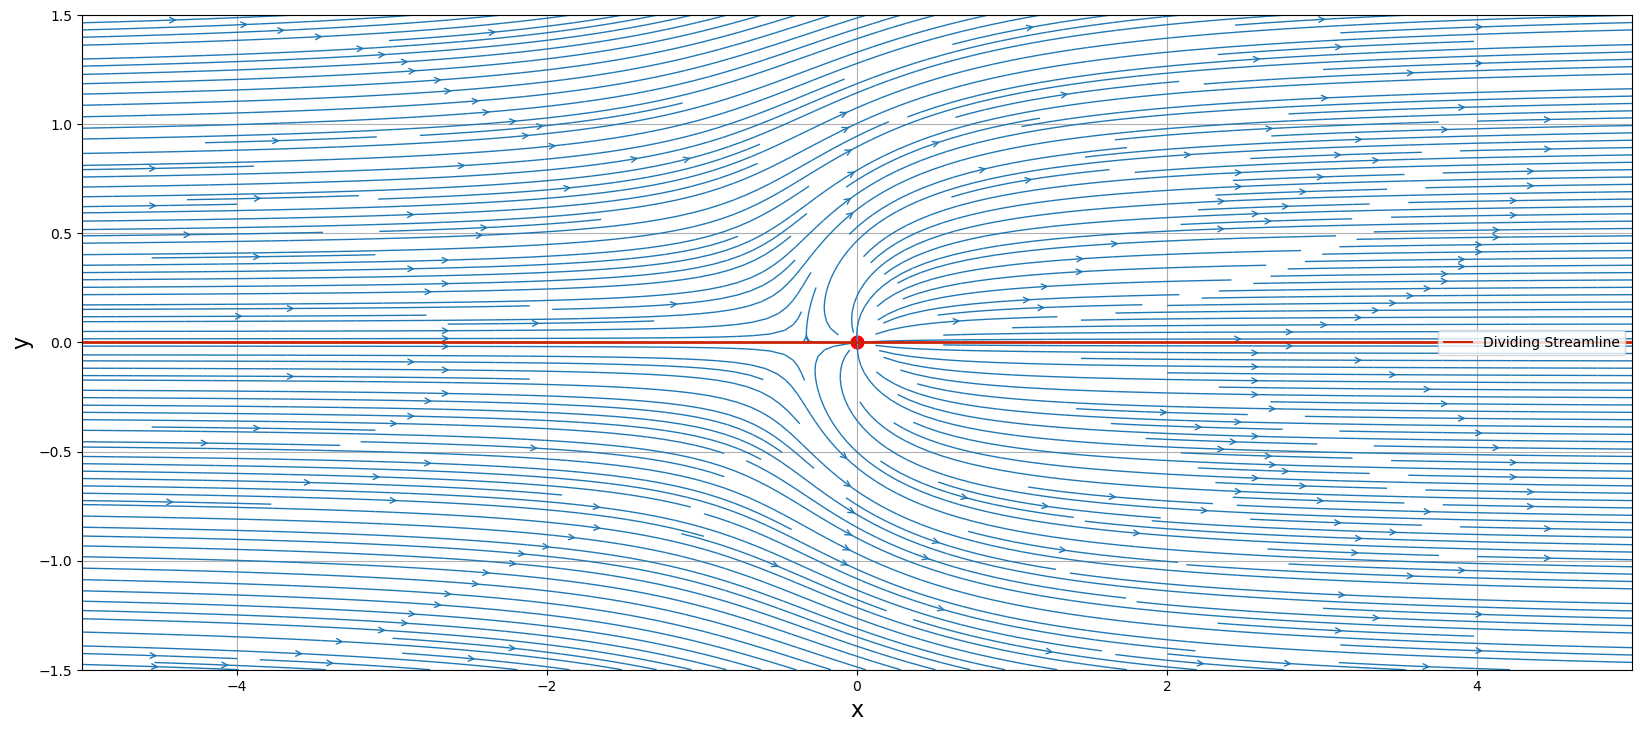

In [11]:
#### Source in free stream flow #####
### Defining a source ###
def get_velocity(strength, xs, ys, X, Y):
     # Here, input the equation for u_source from the equations above
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)

    # Here, input the equation for v_source from the equations above
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
     # Here, input the equation for psi from the equations above
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

source_strength = 2.5                        # Strength of source singularity
x_source = 0.0                             # X coordinate of source singularity
y_source =  0.0   

print(x_source, y_source)                              

x_sink = 0.0
y_sink = 0.0



u_sink, v_sink = get_velocity(-source_strength, x_sink, y_sink, X, Y)
psi_sink = get_stream_function(-source_strength, x_sink, y_sink, X, Y)
u_source, v_source = get_velocity(source_strength, x_source, y_source, X, Y)
psi_source = get_stream_function(source_strength, x_source, y_source, X, Y)


# Superposition:
U_Total = u_freestream + u_source 
V_Total = v_freestream + v_source
psi_Total = psi_freestream + psi_source 

width = 20
height = 8.5

# Setting up standard plotting functions once again
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, U_Total, V_Total, density=3, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi_Total, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid')
legend_proxy = [plt.Line2D([0], [0], linestyle='-', color='#CD2305')]
plt.scatter(x_source, y_source, label = "Source", color = 'red', s = 80, marker ='o')
plt.scatter(x_sink, y_sink, label = "Source", color = 'red', s = 80, marker ='o')
plt.legend(handles=[legend_proxy[0]], labels=['Dividing Streamline', 'Source'])
plt.show()


# Sink in Freestream Flow

## Approach

My approucbh for ploting a source in the freestream flow is to define the velocity profile of a source and call back to the defination of freestram flow defined earlier. The using super postion to add up the flow that is generated. We can keep the same value for strength, all we have to do is make the value negative to making a source a sink.

## Equation
### $\psi$ = $V_{\infty} r \sin{\theta} + \frac{-\Lambda}{2\pi}\theta$

### $u_{sink} (x,y) = \frac{-\sigma}{2\pi}$ $\frac{x-x_{sink}}{(x-x_{sink})^2+(y-y_{sink})^2}$

### $v_{sink} (x,y) = \frac{-\sigma}{2\pi}$ $\frac{y-y_{sink}}{(x-x_{sink})^2+(y-y_{sink})^2}$

### $u_{sink} (x,y) = \frac{-\sigma}{2\pi}$ $\frac{y-y_{sink}}{x-x_{sink}}$



## Code
All I do make the strength value a negative value while keeping the vairbles relativly the same. Agian using superposition to add the velocitys and stream functions together.

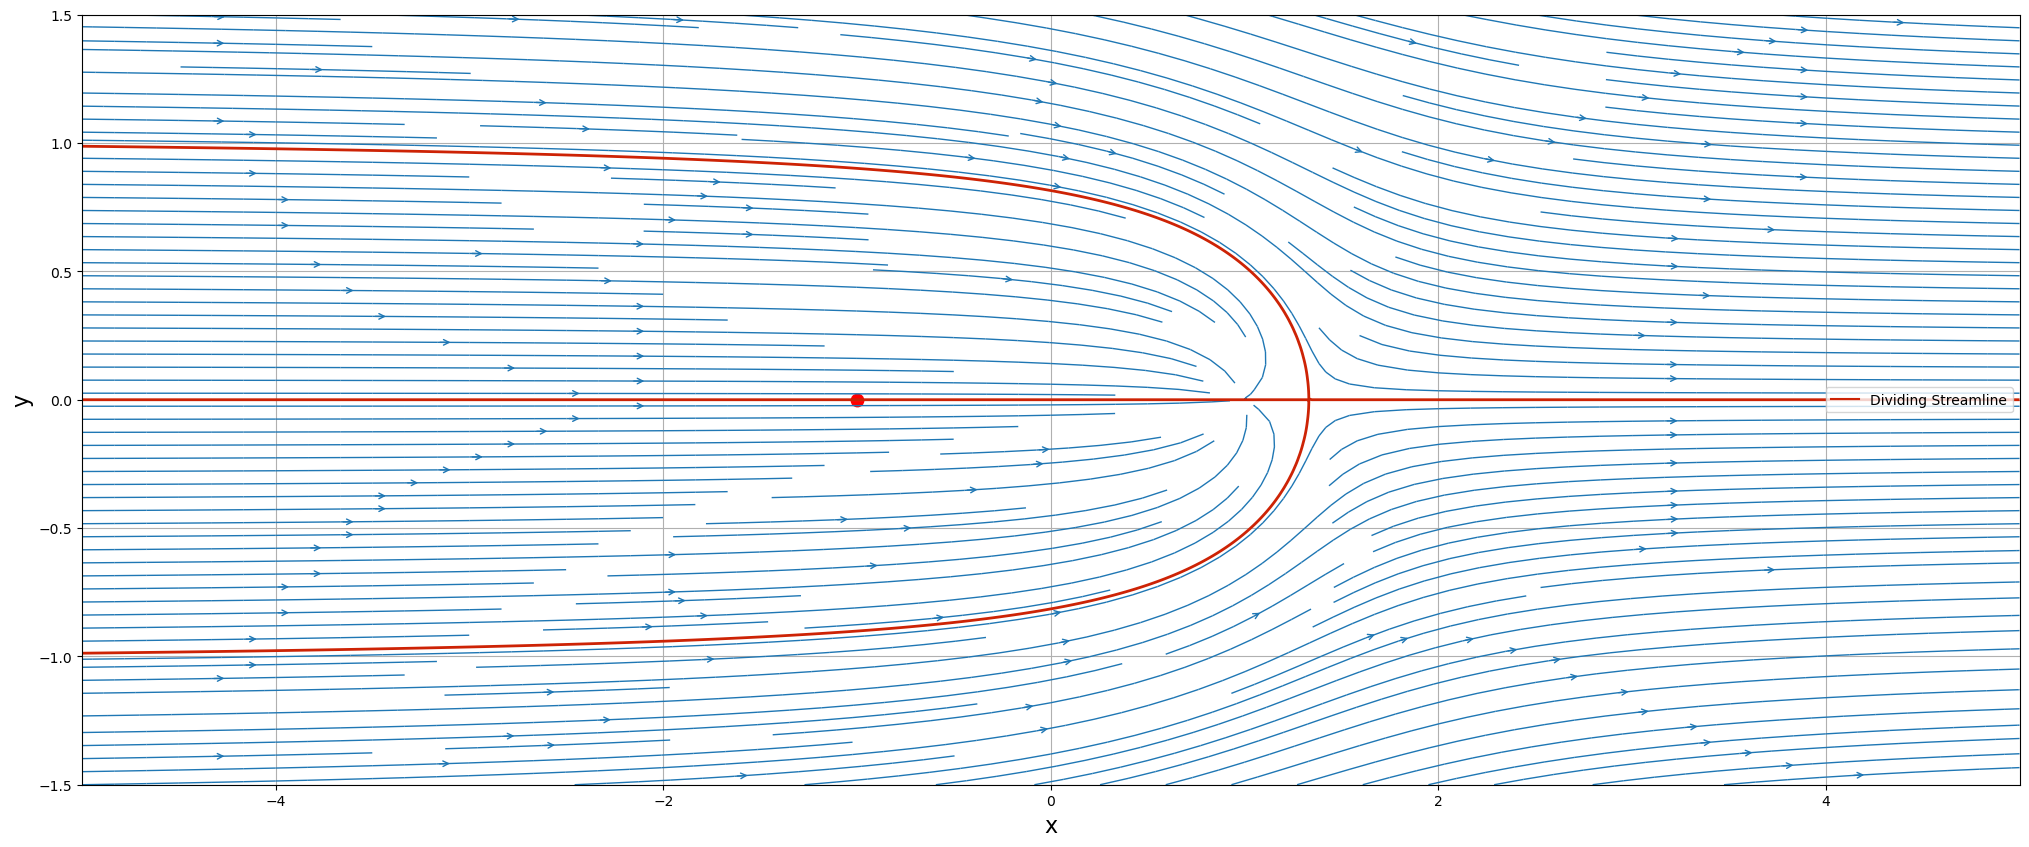

In [158]:
#### Sunk in free stream flow #####

# Superposition:
U_Total = u_freestream + u_sink
V_Total = v_freestream + v_sink
psi_Total = psi_freestream + psi_sink


width = 25
height = 10
# Setting up standard plotting functions once again
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
legend_proxy = [plt.Line2D([0], [0], linestyle='-', color='#CD2305')]
plt.streamplot(X, Y, U_Total, V_Total, density=2, linewidth=1, arrowsize=1, arrowstyle='->') ### Freestream plot
plt.contour(X, Y, psi_Total, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid') ###dividing steamlin
plt.scatter(x_source, y_source, color = 'red', s = 80, marker ='o')
plt.legend(handles=[legend_proxy[0]], labels=['Dividing Streamline', 'Source'])
plt.show()

# Doublet 

## Approach

For plotting a doublet we need to change our governign equations. Then repeat the process for plotting the streamlines in the X and Y direction. As well as a new stream function specificaly for the doublet. This time instead of a source or sink strenght value defined by $\sigma$ we use $\kappa$ as the strength value for the doublet. $\kappa =  2.5$.

## Equations 

Here are the equations I used to define the Velocity in the X and Y direction, as well as defining the Stream Function for a Doublet.

### $u_{doublet} (x,y) = \frac{-\kappa}{2\pi}$ $\frac{(x-x_{doublet})^2+(y-y_{doublet})^2}{((x-x_{doublet})^2+(y-y_{doublet})^2)^2}$

### $v_{doublet} (x,y) = \frac{-\kappa}{2\pi}$ $\frac{2*(x-x_{doublet})+(y-y_{doublet})}{(x-x_{doublet})^2+(y-y_{doublet})^2}$

### $u_{doublet} (x,y) = \frac{-\kappa}{2\pi}$ $\frac{(y-y_{doublet})}{(x-x_{doublet})^2+(y-y_{doublet})^2}$


## Code

Firstly I defined a velocity in the U and V direction using the equations above. As well as defining the stream function for the doublet. I selected $(0,0)$ as the loaction of the doublet. The I called to find the velocity and stream function at that location and plotted the results, and using plt.contour to show the stagnation lines that are present in red. The stream lines do see to be a off, most likly caused by the density I choice to plot .

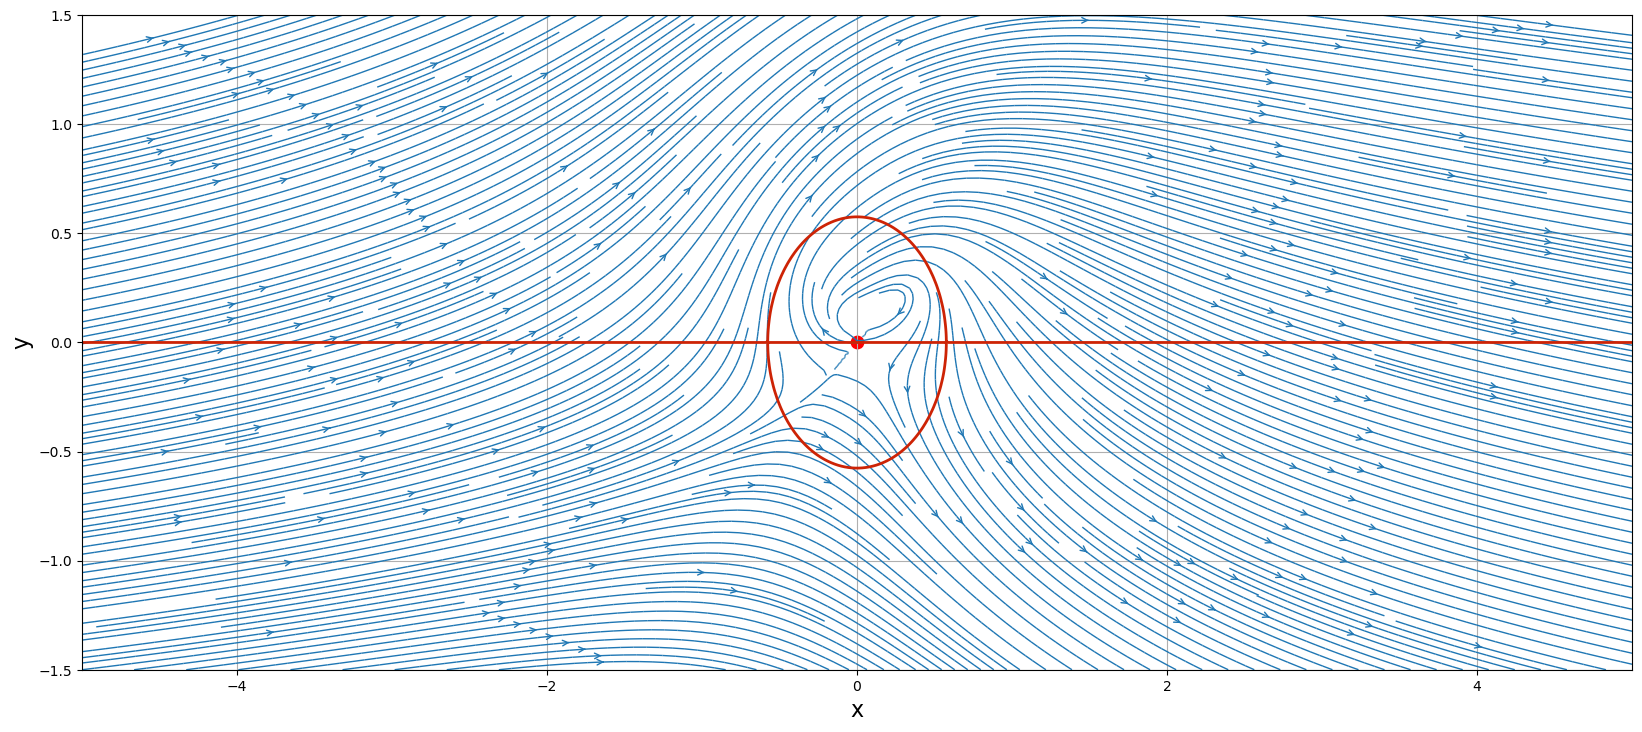

In [42]:
### Doublet equations ##
k = 2.5
### Defining a Doublet ###
def get_velocity(k, xd, yd, X, Y):
     # Here, input the equation for u_source from the equations above
    u_dub = (-k / (2 * np.pi)) * ((X - xd)**2 - (Y - yd)**2) / (((X - xd)**2 + (Y - yd)**2)**2)

    # Here, input the equation for v_source from the equations above
    v_dub = (-k / (2 * np.pi)) * (2*((X - xd)  - (Y - yd))) / ((X - xd)**2 + (Y - yd)**2)
    
    return u_dub, v_dub

def get_stream_function(k, xd, yd, X, Y):
     # Here, input the equation for psi from the equations above
    #psi_dub = (-k / (2 * np.pi)) * np.arctan2((Y - yd), ((X - xd)**2 + (Y - yd)**2))
    
    psi_dub = (-k / (2 * np.pi)) * ((Y - yd) / ((X - xd)**2 + (Y - yd)**2))

    return psi_dub


x_dub = 0.0
y_dub = 0.0

u_dub, v_dub = get_velocity( k, x_dub, y_dub, X, Y)
psi_dub = get_stream_function( k, x_dub, y_dub, X, Y)

psi_tot = psi_dub + psi_freestream

u_tot = u_dub + u_freestream
v_tot = v_dub + v_freestream

r = (k / (2* np.pi * u_inf))

theta = np.pi

# Here we set up standard plotting functions. 
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

# Streamplot is a new plotting function that we will use to display the streamlines. 
# Notice that when plotting the freestream flow, we used u_freestream and v_freestream.
# Now we change these values to u_source and v_source. 
plt.streamplot(X, Y, u_tot, v_tot, density=4, linewidth=1, arrowsize=1, arrowstyle='->')

plt.contour(X,Y, psi_tot, levels = [0], colors='#CD2305', linewidths=2, linestyles='solid')
# We should also add a point to the plot to represent the location of the source. 
# plt.scatter is not specific to our potential flow methods, it is just used to plot a singular point
plt.scatter(x_dub, y_dub, color = 'red', s = 80, marker ='o')

plt.scatter(r, theta, color = 'red', s = 80, marker ='o')


#plt.legend()
plt.show()

# Problem 2
# Potential Flow Airfoil

## Approach 

This problem had its issues in establishing the stagnation streamline. The idea is to create a series of sources and sink in which the stagnation stream line would approximate a symentric airfoil of our choosing.

## Equations

The equatiosn are the same for sources/ sinks a sign change on the strenght value indicating wheater the point is a source/sink.

### $\psi$ = $V_{\infty} r \sin{\theta} + \frac{\pm\Lambda}{2\pi}\theta$

### $u_{sink} (x,y) = \frac{\pm\sigma}{2\pi}$ $\frac{x-x_{sink}}{(x-x_{sink})^2+(y-y_{sink})^2}$

### $v_{sink} (x,y) = \frac{\pm\sigma}{2\pi}$ $\frac{y-y_{sink}}{(x-x_{sink})^2+(y-y_{sink})^2}$

### $u_{sink} (x,y) = \frac{\pm\sigma}{2\pi}$ $\frac{y-y_{sink}}{x-x_{sink}}$


## Code

Following the guide that was provided as well as the workshop tips and tricks. I developed anf array of 12 values of varying streangths and locations on a plot of the NACA 0030 airfoil to try and approximate the airfoil geomatry. There are three attempts of trying to get as close as possible.

Here is approximation attempt 1 we have a general size of the airfoil but there is room for improvement

C:\Users\manbi\AppData\Local\Temp\ipykernel_20204\3400588397.py:68: UserWarning: The following kwargs were not used by contour: 'linesytle'
  CS = plt.contour(X,Y, psi_Total, levels = [0.0], colors = 'red', linewidths=2, linesytle = 'solid')


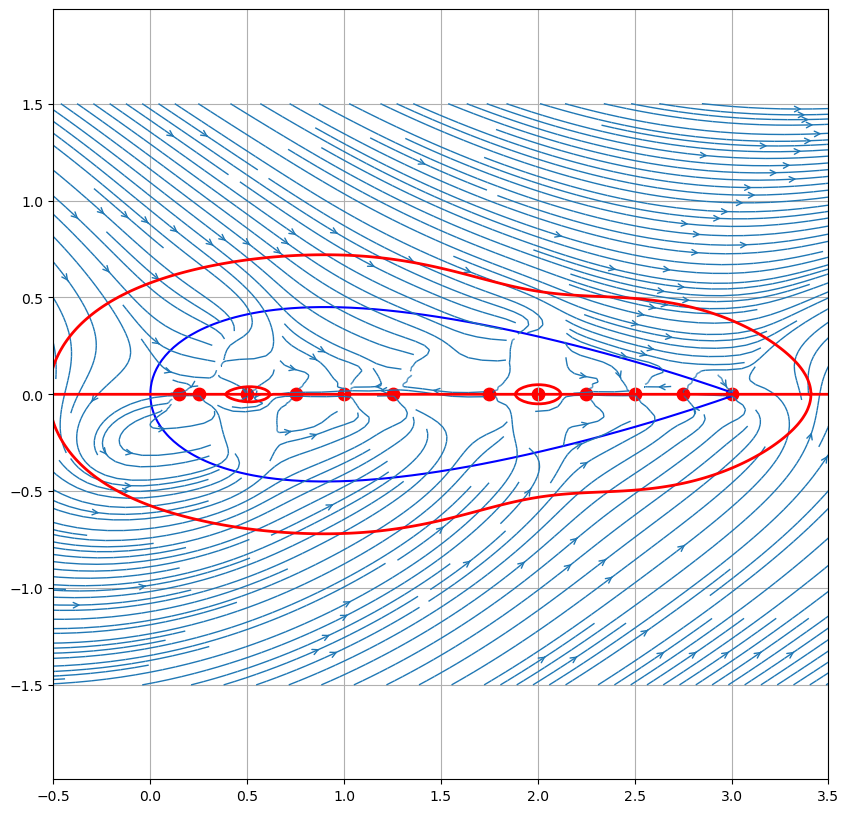

In [188]:
# Lets start by resetting/clearing our total/superposition variables.
U_Total = 0
V_Total = 0
psi_Total = 0

Strengths = np.array([-3, -2.75, -2.5, -2.5, -2.25, -2, -1.75, -1.5, -1.5, -1.25, -1.15, -1])
x_loc = np.array([.15, 0.25, 0.5, 0.75, 1, 1.25, 1.75, 2, 2.25, 2.5, 2.75, 3])
y_loc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


u_inf = 2
# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y

U_Total = u_freestream 
V_Total = v_freestream 
psi_Total = psi_freestream 
#### Varibles ####

v_inf = 2
c = 3
Re = 0
alf = 0
t = .3

foil = '0030'
naca = True
pyxfoil.GetPolar(foil, naca, alf, Re)

filename = 'Data/naca0030/naca0030_surfCP_Re0.00e+00a0.0.dat'
x30 , y30, Cp = np.loadtxt(filename, unpack = True, skiprows = 3)

plt.figure(figsize = (10,10))
plt.grid()
plt.axis('equal') 
plt.xlim(-0.5,3.5)
plt.ylim(-1.5,1.5)




# The above arrays define the data/definitions to create 4 different sources/sinks. 
# Lets see how we can write our for loop in order to loop through this data.

n = len(Strengths)                  # n is the number of sources/sinks we would like to create. 

for i in range(0,n):              # This line basically reads for all values of i between 0 and n (in this case 4)
    U, V =   get_velocity(Strengths[i], x_loc[i], y_loc[i], X, Y)                     # Here you should input the necessary functions 
    psi =    get_stream_function(Strengths[i], x_loc[i], y_loc[i], X,Y)                      # (these functions need to vary with each iteration of our loop)
    
    U_Total  += U                  # Here, you want to add up the contribution on each iteration of the loop. 
                                    # The value of U_Total needs to change each time.

    V_Total  += V                   # To accmplish this, we can use U_Total = U_Total + u or you can use the recursion operator U_Total += u.
    psi_Total += psi              # This takes the previous value of U_Total (or V_Total/psi_Total) and adds the 
                                    # value of u, v and psi (which changes on each loop iteration)
    plt.scatter(x_loc[i], y_loc[i], color = 'red', s = 80, marker ='o')


# Here we set up standard plotting functions. 

plt.plot(x30*3, y30*3, color = 'blue', linestyle = '-')
plt.streamplot(X, Y, U_Total, V_Total, density=4, linewidth=1, arrowsize=1, arrowstyle='->')
CS = plt.contour(X,Y, psi_Total, levels = [0.0], colors = 'red', linewidths=2, linesytle = 'solid')
CS.collections[0].set_label('Div. Streamline')

plt.show()



Here is approximation number 2 which looks more promising but for some unknown reason the approximantion at the leading edge of the wing is way of porprtion. Even thought the values are less the before. My train of thought is the strengths dont addd up to zero which is causing the issue of there not being a closed stagnation stream line.

-3.6


C:\Users\manbi\AppData\Local\Temp\ipykernel_20204\3226370221.py:71: UserWarning: The following kwargs were not used by contour: 'linesytle'
  CS = plt.contour(X,Y, psi_Total, levels = [0.0], colors = 'red', linewidths=2, linesytle = 'solid')


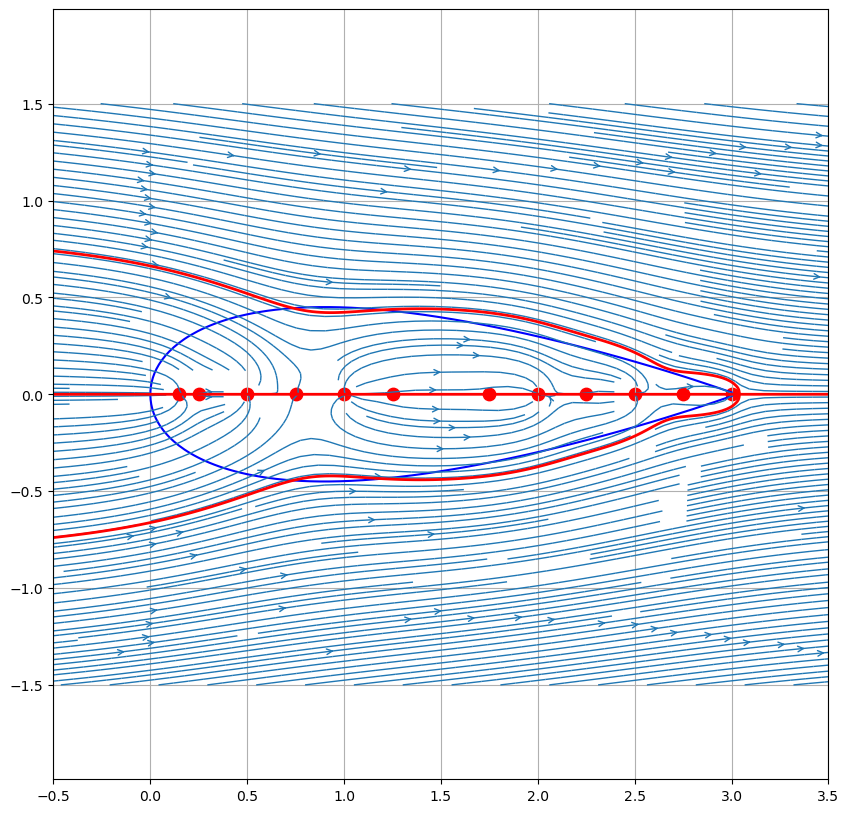

In [213]:
# Lets start by resetting/clearing our total/superposition variables.
U_Total = 0
V_Total = 0
psi_Total = 0

Strengths = np.array([-1.5, .4, -1.7, -.3, 1.4, .2, .2, -1.2, .15, -1, .15, -.4])

print(sum(Strengths))

x_loc = np.array([.15, 0.25, 0.5, 0.75, 1, 1.25, 1.75, 2, 2.25, 2.5, 2.75, 3])
y_loc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


u_inf = 2
# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y

U_Total = u_freestream 
V_Total = v_freestream 
psi_Total = psi_freestream 
#### Varibles ####

v_inf = 2
c = 3
Re = 0
alf = 0
t = .3

foil = '0030'
naca = True
pyxfoil.GetPolar(foil, naca, alf, Re)

filename = 'Data/naca0030/naca0030_surfCP_Re0.00e+00a0.0.dat'
x30 , y30, Cp = np.loadtxt(filename, unpack = True, skiprows = 3)

plt.figure(figsize = (10,10))
plt.grid()
plt.axis('equal') 
plt.xlim(-0.5,3.5)
plt.ylim(-1.5,1.5)




# The above arrays define the data/definitions to create 4 different sources/sinks. 
# Lets see how we can write our for loop in order to loop through this data.

n = len(Strengths)                  # n is the number of sources/sinks we would like to create. 

for i in range(0,n):              # This line basically reads for all values of i between 0 and n (in this case 4)
    U, V =   get_velocity(Strengths[i], x_loc[i], y_loc[i], X, Y)                     # Here you should input the necessary functions 
    psi =    get_stream_function(Strengths[i], x_loc[i], y_loc[i], X,Y)                      # (these functions need to vary with each iteration of our loop)
    
    U_Total  += U                  # Here, you want to add up the contribution on each iteration of the loop. 
                                    # The value of U_Total needs to change each time.

    V_Total  += V                   # To accmplish this, we can use U_Total = U_Total + u or you can use the recursion operator U_Total += u.
    psi_Total += psi              # This takes the previous value of U_Total (or V_Total/psi_Total) and adds the 
                                    # value of u, v and psi (which changes on each loop iteration)
    plt.scatter(x_loc[i], y_loc[i], color = 'red', s = 80, marker ='o')


# Here we set up standard plotting functions. 

plt.plot(x30*3, y30*3, color = 'blue', linestyle = '-')
plt.streamplot(X, Y, U_Total, V_Total, density=4, linewidth=1, arrowsize=1, arrowstyle='->')
CS = plt.contour(X,Y, psi_Total, levels = [0.0], colors = 'red', linewidths=2, linesytle = 'solid')
CS.collections[0].set_label('Div. Streamline')

plt.show()



Here is the final approximation. Fixing the issue with making the strangth values equal zero closed my stagnation stream line, and the values i choice ended up as close as I can get it to the airfoil geometry. 

-2.220446049250313e-16


C:\Users\manbi\AppData\Local\Temp\ipykernel_20204\1341168913.py:71: UserWarning: The following kwargs were not used by contour: 'linesytle'
  CS = plt.contour(X,Y, psi_Total, levels = [0.0], colors = 'red', linewidths=2, linesytle = 'solid')


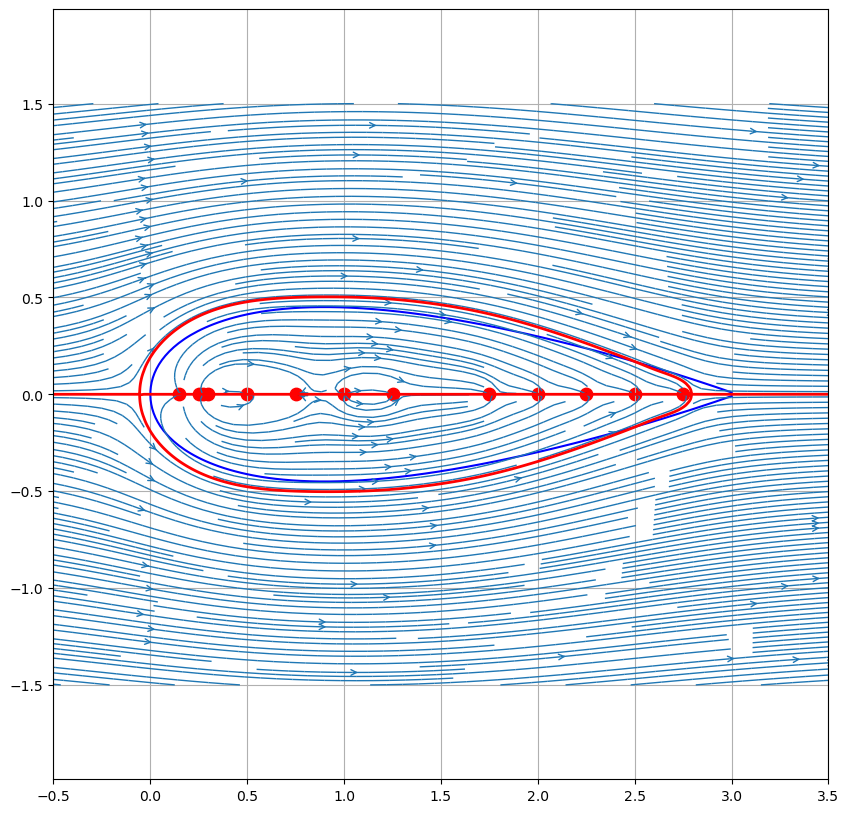

In [227]:
# Lets start by resetting/clearing our total/superposition variables.
U_Total = 0
V_Total = 0
psi_Total = 0

Strengths = np.array([1.75, .25, 2.55 -1.25,  1.25, -1.25, -1, 1, -.75, -.75, -.5, -.5, -.4, -.4])

print(sum(Strengths))

x_loc = np.array([.15, 0.25, .27, .30, 0.5, 0.75, 1, 1.25, 1.75, 2, 2.25, 2.5, 2.75, 3])
y_loc = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


u_inf = 2
# Computing the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# Computing the stream-function
psi_freestream = u_inf * Y

U_Total = u_freestream 
V_Total = v_freestream 
psi_Total = psi_freestream 
#### Varibles ####

v_inf = 2
c = 3
Re = 0
alf = 0
t = .3

foil = '0030'
naca = True
pyxfoil.GetPolar(foil, naca, alf, Re)

filename = 'Data/naca0030/naca0030_surfCP_Re0.00e+00a0.0.dat'
x30 , y30, Cp = np.loadtxt(filename, unpack = True, skiprows = 3)

plt.figure(figsize = (10,10))
plt.grid()
plt.axis('equal') 
plt.xlim(-0.5,3.5)
plt.ylim(-1.5,1.5)




# The above arrays define the data/definitions to create 4 different sources/sinks. 
# Lets see how we can write our for loop in order to loop through this data.

n = len(Strengths)                  # n is the number of sources/sinks we would like to create. 

for i in range(0,n):              # This line basically reads for all values of i between 0 and n (in this case 4)
    U, V =   get_velocity(Strengths[i], x_loc[i], y_loc[i], X, Y)                     # Here you should input the necessary functions 
    psi =    get_stream_function(Strengths[i], x_loc[i], y_loc[i], X,Y)                      # (these functions need to vary with each iteration of our loop)
    
    U_Total  += U                  # Here, you want to add up the contribution on each iteration of the loop. 
                                    # The value of U_Total needs to change each time.

    V_Total  += V                   # To accmplish this, we can use U_Total = U_Total + u or you can use the recursion operator U_Total += u.
    psi_Total += psi              # This takes the previous value of U_Total (or V_Total/psi_Total) and adds the 
                                    # value of u, v and psi (which changes on each loop iteration)
    plt.scatter(x_loc[i], y_loc[i], color = 'red', s = 80, marker ='o')


# Here we set up standard plotting functions. 

plt.plot(x30*3, y30*3, color = 'blue', linestyle = '-')
plt.streamplot(X, Y, U_Total, V_Total, density=4, linewidth=1, arrowsize=1, arrowstyle='->')
CS = plt.contour(X,Y, psi_Total, levels = [0.0], colors = 'red', linewidths=2, linesytle = 'solid')
CS.collections[0].set_label('Div. Streamline')

plt.show()



Here is the code for calculating the error values.

## Equtions


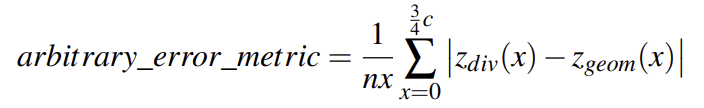

In [102]:

# In order to extract the dividing streamline, we can use the following function. 

def collect_contour(X, Y, psi, xs = 0, xe = 3, af = 1):
    if af == 1:
        levels = 0

    plt.figure()
    CS = plt.contour(X, Y, psi, levels=[-source_strength / 2, source_strength / 2], colors='#CD2305', linewidths=2, linestyles='solid')
    P = CS.collections[0].get_paths()[0]
    plt.close()

    V = P.vertices
    x_coord = np.array(V[:,0])
    y_coord = np.array(V[:,1])


    # Now we would like to remove the coordinates that aren't relevant. 
    # Since we are dealing with an airfoil, lets assume the airfoil begins at (0,0) for the leading edge.
    # You may need to adjust the valuye of xe depending on 3/4s of the chord. 
    p = len(x_coord)
    
    for i in range(p-1, 0, -1):
        if (x_coord[i] < xs) or (x_coord[i] > xe):
            x_coord = np.delete(x_coord, i)
            y_coord = np.delete(y_coord, i)
    
    y_coord = abs(y_coord)
    return x_coord, y_coord

# The above function will give the coordinates for your dividing streamline. 
# From here you should interpolate these coordinates to a new vector for x and then use the formula provided
# In the problem statement to determine the error for each approximation. 
# The only inputs you need will be X, Y, and the stream function for you airfoil approximation. You should change 
# levels to be equal to 0 in the plt.contour() function within the collect_contour function.

x_div, y_div = collect_contour(X, Y, psi_demo)

### Conclusion

Sources and sinks have much uses in predicting how stagnation occurs in a freesteam flow. Using these opens the room to create various approximations. I did not have time to finish the entire proeject.